In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import multiprocessing as mp
import os
import cv2
from PIL import Image, ImageFilter
from scipy.ndimage import gaussian_filter
from scipy import ndimage
from scipy import misc
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = ""
FileList = os.listdir("/content/drive/MyDrive/BancoImagenes/Final/0")
FileList1 = os.listdir("/content/drive/MyDrive/BancoImagenes/Final/1")

In [ ]:
FileList

In [ ]:
FileList1

In [ ]:
NImg=len(FileList)
print(NImg)

7421


In [ ]:
NImg1=len(FileList1)
print(NImg1)

5667


In [ ]:
ListImg=[]
Lig=[]
LiH=[]
LiLa=[]
Dir= "/content/drive/MyDrive/BancoImagenes/Final/0/"
for nameImg in FileList:
    Img = cv2.imread(Dir+nameImg)
    Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
    ImgGray=cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
    ImgH = cv2.cvtColor(Img, cv2.COLOR_RGB2HSV)
    ImgL=cv2.cvtColor(Img, cv2.COLOR_BGR2Lab)
    ListImg.append(Img)
    Lig.append(ImgGray)
    LiH.append(ImgH)
    LiLa.append(ImgL)

In [ ]:
ListImg1=[]
Lig1=[]
LiH1=[]
LiLa1=[]
Dir= "/content/drive/MyDrive/BancoImagenes/Final/1/"
for nameImg in FileList1:
    Img = cv2.imread(Dir+nameImg)
    Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
    ImgGray=cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY) #imagenes en escala de grises
    ImgH = cv2.cvtColor(Img, cv2.COLOR_RGB2HSV) #imagenes en HSV
    ImgL=cv2.cvtColor(Img, cv2.COLOR_BGR2Lab)
    ListImg1.append(Img)
    Lig1.append(ImgGray)
    LiH1.append(ImgH)
    LiLa1.append(ImgL)

In [ ]:
len(Lig)

7421

# Imágenes

* RGB

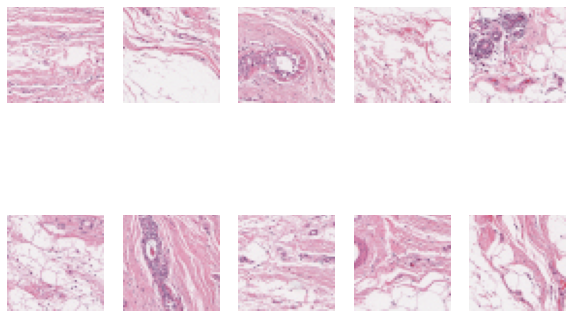

In [ ]:
from google.colab.patches import cv2_imshow
rows = 2
columns = 5
fig = plt.figure(figsize=(10, 7))
for n in range(10):
  fig.add_subplot(rows, columns, n+1) 
  
  plt.imshow(ListImg[n]) 
  plt.axis('off') 
  

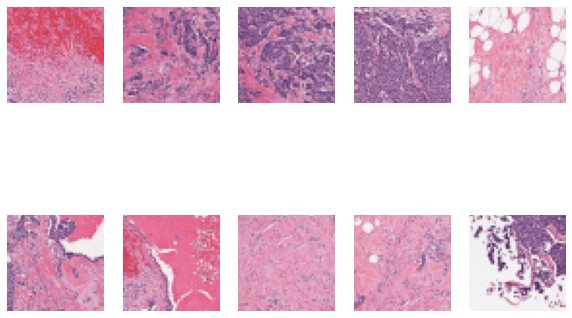

In [ ]:
fig = plt.figure(figsize=(10, 7))
for n in range(10):
  fig.add_subplot(rows, columns, n+1) 
  
  plt.imshow(ListImg1[n]) 
  plt.axis('off') 

* Escala de grises

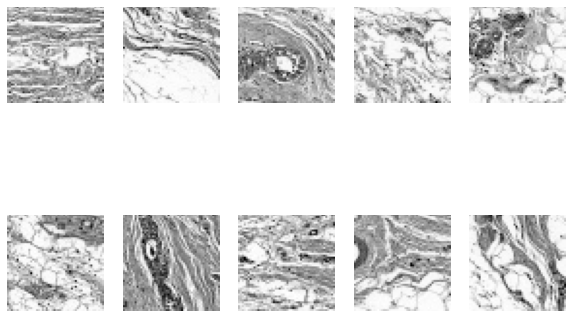

In [ ]:
fig1 = plt.figure(figsize=(10, 7))
for n in range(10):
  fig1.add_subplot(rows, columns, n+1) 
  
  plt.imshow(Lig[n],cmap='gray') 
  plt.axis('off')

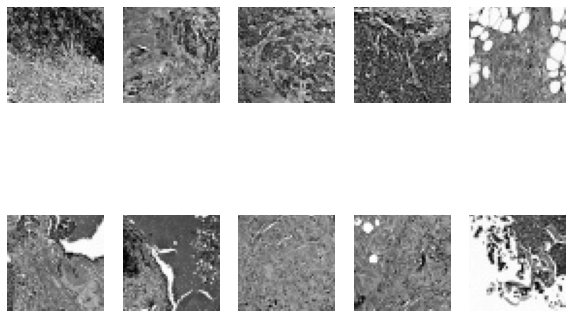

In [ ]:
fig1 = plt.figure(figsize=(10, 7))
for n in range(10):
  fig1.add_subplot(rows, columns, n+1) 
  
  plt.imshow(Lig1[n],cmap='gray') 
  plt.axis('off')

* HSV

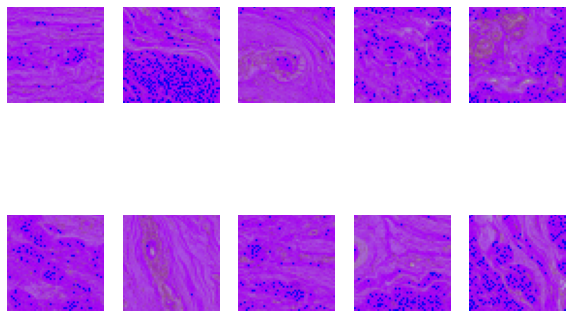

In [ ]:
fig2 = plt.figure(figsize=(10, 7))

for n in range(10):
  fig2.add_subplot(rows, columns, n+1) 
  
  plt.imshow(LiH[n]) 
  plt.hsv()
  plt.axis('off')

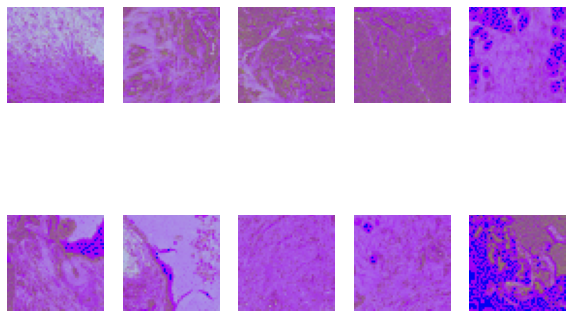

In [ ]:
fig2 = plt.figure(figsize=(10, 7))

for n in range(10):
  fig2.add_subplot(rows, columns, n+1) 
  
  plt.imshow(LiH1[n]) 
  plt.hsv()
  plt.axis('off')

* Lab

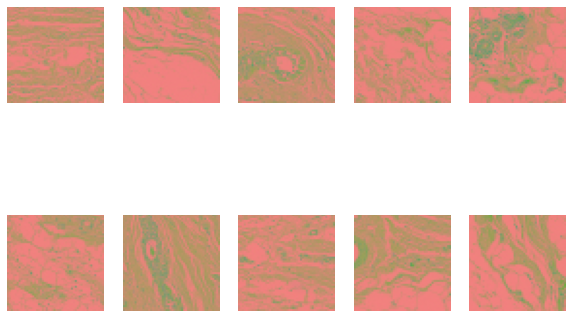

In [ ]:
fig3 = plt.figure(figsize=(10, 7))

for n in range(10):
  fig3.add_subplot(rows, columns, n+1) 
  
  plt.imshow(LiLa[n]) 
  plt.axis('off')

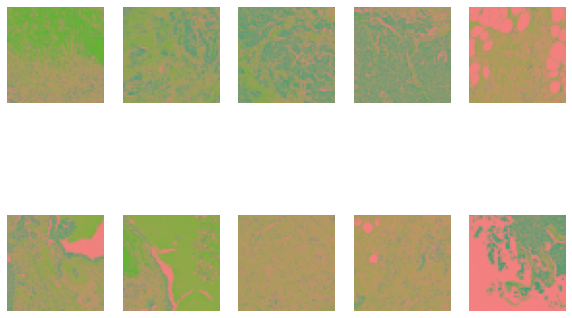

In [ ]:
fig3 = plt.figure(figsize=(10, 7))

for n in range(10):
  fig3.add_subplot(rows, columns, n+1) 
  
  plt.imshow(LiLa1[n]) 
  plt.axis('off')

Un gráfico 3D con cada eje representando uno de los canales en el espacio de color - RGB

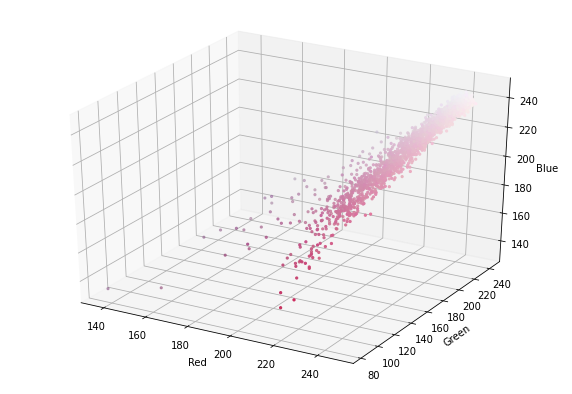

In [ ]:
fig3 = plt.figure(figsize=(10, 7))
axis= fig3.add_subplot(1, 1, 1, projection="3d") 
n=3
r, g, b = cv2.split(ListImg[n])

#axis = fig3.add_subplot(1, 1, 1, projection="3d")
pixel_colors = ListImg[n].reshape((np.shape(ListImg[n])[0]*np.shape(ListImg[n])[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Un gráfico 3D con cada eje representando uno de los canales en el espacio de color - HSV

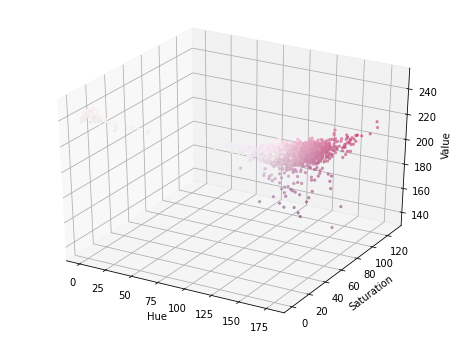

In [ ]:
n=3
h, s, v = cv2.split(LiH[n])
fig = plt.figure(figsize=(8, 6))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

* Histograma dividido en RGB

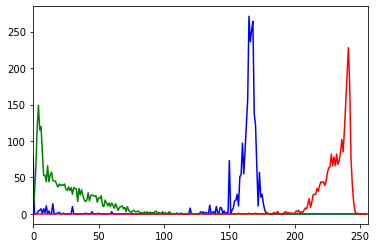

In [ ]:
color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([LiH[n]], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])

plt.show()

Segmentación con máscara de color, se elige un rango de colores

In [ ]:
light_purple = (60, 35, 140)
dark_purple = (180,255,255)

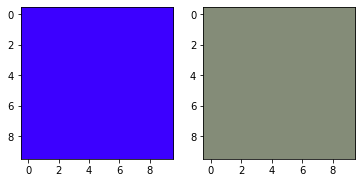

In [ ]:
from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), light_purple, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_purple, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

# Aplicar máscara para las imagenes sin cáncer

In [ ]:
mask=[]
result=[]
for n in range(7421):
  mask1= cv2.inRange(LiH[n], light_purple, dark_purple)
  mask.append(mask1)

for n in range(7421):
  result1=cv2.bitwise_and(ListImg[n], ListImg[n], mask=mask[n])
  result1=cv2.cvtColor(result1, cv2.COLOR_BGR2RGB)
  result.append(result1)


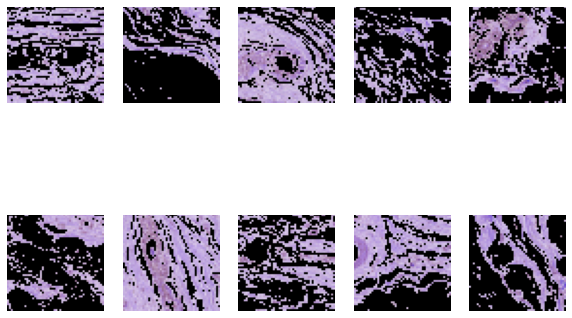

In [ ]:
fig4 = plt.figure(figsize=(10, 7))

for n in range(10):
  fig4.add_subplot(rows, columns, n+1) 
  
  plt.imshow(result[n]) 
  plt.axis('off')

# Codigo para guardar las imagenes en la carpeta 0

In [ ]:
path="/content/drive/MyDrive/BancoImagenes/Color/0"
if not os.path.exists(path):
  os.makedirs(path)

for n in range (7421):
  cv2.imwrite(path + "/image" + str(n) +"0.jpeg",result[n])

# Aplicar máscara para las imagenes con cáncer

In [ ]:
maskc=[]
resultc=[]
for n in range(5667):
  mask2= cv2.inRange(LiH1[n], light_purple, dark_purple)
  maskc.append(mask2)

for n in range(5667):
  result2=cv2.bitwise_and(ListImg1[n], ListImg1[n], mask=maskc[n])
  result2=cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
  resultc.append(result2)

In [ ]:
len(maskc)

5667

# Codigo para guardar las imagenes en la carpeta 1

In [ ]:
path="/content/drive/MyDrive/BancoImagenes/Color/1"
if not os.path.exists(path):
  os.makedirs(path)

for n in range (5667):
  cv2.imwrite(path + "/image" + str(n) +"1.jpeg",resultc[n])

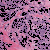

In [ ]:
#re=cv2.cvtColor(resultc[1], cv2.COLOR_BGR2RGB)
cv2_imshow(resultc[2])

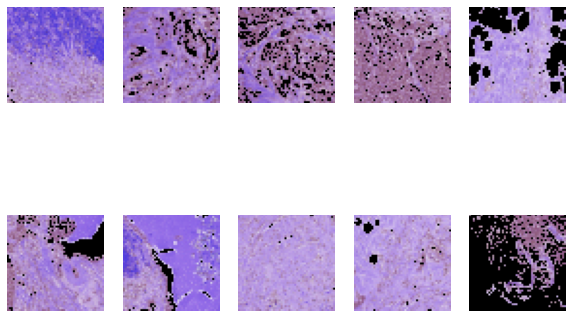

In [ ]:
fig5 = plt.figure(figsize=(10, 7))

for n in range(10):
  fig5.add_subplot(rows, columns, n+1) 
  
  plt.imshow(resultc[n]) 
  plt.axis('off')

In [ ]:
mask = cv2.inRange(LiH[n], light_purple, dark_purple)

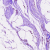

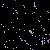

In [ ]:
#result = cv2.bitwise_and(ListImg[3], ListImg[3], mask=mask)

maskg = cv2.inRange(LiH[n], (130, 25, 25), (160, 255,255)) # prueba de máscaras 
imask = maskg>0
green = np.zeros_like(ListImg[n], np.uint8)
green[imask] = ListImg[n][imask]

cv2_imshow(ListImg[n])
cv2_imshow(green)

https://realpython.com/python-opencv-color-spaces/

https://datasmarts.net/es/como-usar-histogramas-de-color-para-describir-imagenes-en-opencv/

http://color.lukas-stratmann.com/color-systems/hsv.html